## Table of content
### Importing libraries
### Importing data
### Stating the hypothesis
### Regression analysis

### Importing libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
# This oensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### Importing data

In [4]:
# Creating path

path = r"C:\Users\tseki\OneDrive\Documents\Careerfoundry\Data immersion\Achievement 6"

In [5]:
data = pd.read_csv(os.path.join(path, 'Data', 'Prepared', 'data_merge.csv'), index_col = [0])

In [6]:
data.head()

,price,bed,bath,acre_lot,city,zip_code,house_size,sold_date,county
0,525000.0,3.0,3.0,0.45,Agawam,1001.0,2314.0,2014-06-25,Hampden
1,289900.0,3.0,2.0,0.36,Agawam,1001.0,1276.0,2012-10-12,Hampden
2,384900.0,3.0,2.0,0.46,Agawam,1001.0,1476.0,1986-11-20,Hampden
3,199999.0,3.0,2.0,1.76,Agawam,1001.0,1968.0,2008-09-19,Hampden
4,419000.0,4.0,2.0,2.00,Pelham,1002.0,1607.0,2005-07-25,Hampshire


### Stating the Hypothesis 

In [7]:
# i would like to further explore the relationship between bath vs prices and house_size vs prices. 


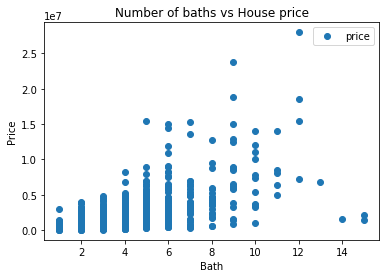

In [9]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'bath', y='price', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of baths vs House price')  
plt.xlabel('Bath')  
plt.ylabel('Price')  
plt.show()

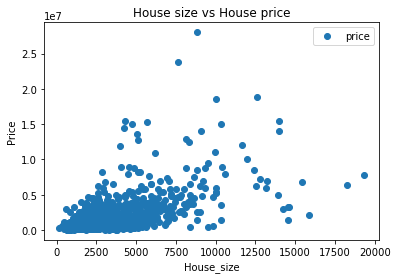

In [11]:
data.plot(x = 'house_size', y='price', style='o')
plt.title('House size vs House price')  
plt.xlabel('House_size')  
plt.ylabel('Price')  
plt.show()

#### Hypothesis 1: the higher the number of baths, the higher the price of the house.
#### Hypothesis 2: the bigger the size of the house, the higher the price of the house.

### Regression analysis-Hypothesis 1

#### Data prep

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = data['bath'].values.reshape(-1,1)
y1 = data['price'].values.reshape(-1,1)

In [20]:
X1

array([[3.],
       [2.],
       [2.],
       ...,
       [2.],
       [3.],
       [1.]])

In [21]:
y1

array([[525000.],
       [289900.],
       [384900.],
       ...,
       [380000.],
       [399900.],
       [339900.]])

In [22]:
# Spliting data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#### Regression analysis

In [23]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fitting the regression object onto the training set.

regression.fit(X1_train, y1_train)

LinearRegression()

In [25]:
# Predicting the values of y1 using X1.

y1_predicted = regression.predict(X1_test)

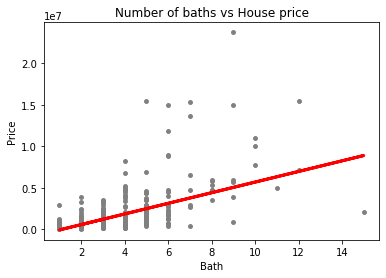

In [26]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Number of baths vs House price')
plot_test.xlabel('Bath')
plot_test.ylabel('Price')
plot_test.show()

In [50]:
# Creating objects that contain the model summary statistics.

RMSE = (mean_squared_error(y1_test, y1_predicted, squared = False)) # This is the root mean squared error
r2 = r2_score(y1_test, y1_predicted) # This is the R2 score.
MAE = mean_absolute_error(y1_test, y1_predicted) # this is the mean absolute error

In [51]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Root Mean squared error: ', rmse)
print('R2 score: ', r2)
print ('Mean_absolute_error:', MAE)

Slope: [[584.97714556]]
Root Mean squared error:  1428402.071353225
R2 score:  0.39106899545689966
Mean_absolute_error: 653657.0206524339


#### The slope confirms there's a positive relationship between  the variables. However, R2 of  0.39 is low and shows that the variance between the model and the actual values is high. Also, a mean absolute error of 653,657 means that on average, the predicted value is off by 653,657 from the actual value. This is outrageous. Performing a multiple regression analysis or trying other models might improve the performance.

In [29]:
# Creating a dataframe comparing the actual and predicted values of y1.

df = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
df.head(30)

,Actual,Predicted
0,269900.0,1.217347e+06
1,799900.0,5.771719e+05
2,799900.0,1.217347e+06
3,1300000.0,1.217347e+06
4,1395000.0,2.497698e+06
5,789000.0,-6.300347e+04
6,549000.0,-6.300347e+04
7,2890000.0,3.137873e+06
8,425000.0,-6.300347e+04
9,449900.0,5.771719e+05


### Regression analysis- hypothesis 2

#### Data prep

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = data['house_size'].values.reshape(-1,1)
y2 = data['price'].values.reshape(-1,1)

In [31]:
X2

array([[2314.],
       [1276.],
       [1476.],
       ...,
       [1336.],
       [2968.],
       [1500.]])

In [32]:
y2

array([[525000.],
       [289900.],
       [384900.],
       ...,
       [380000.],
       [399900.],
       [339900.]])

In [33]:
# Spliting data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#### Regression analysis

In [34]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# fitting the regression object onto the training set

regression.fit(X2_train, y2_train)

LinearRegression()

In [37]:
# Predicting y2 based on x2_test

y2_predicted = regression.predict(X2_test)

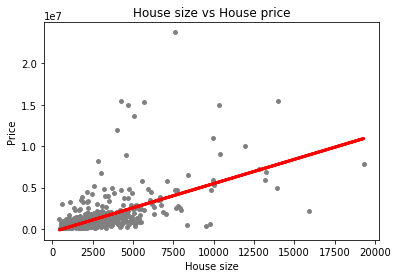

In [38]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('House size vs House price')
plot_test.xlabel('House size')
plot_test.ylabel('Price')
plot_test.show()

In [52]:
# Creating objects that contain the model summary statistics.

RMSE = (mean_squared_error(y2_test, y2_predicted, squared = False)) # This is the root mean squared error
r2 = r2_score(y2_test, y2_predicted) # This is the R2 score.
MAE = mean_absolute_error(y2_test, y2_predicted) # this is the mean absolute error 

In [54]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', RMSE)
print('R2 score: ', r2)
print('Mean absolute error: ', MAE)

Slope: [[584.97714556]]
Mean squared error:  1478849.0200351004
R2 score:  0.34729818483350794
Mean absolute error:  627687.7103049036


#### The slope confirms there's a positive relationship between  the variables. However, R2 of 0.34 is lower than 0.39 even though the mean absolute error of 627,687 is slightly better than for hypothesis 1, it is still not helpful. Though the performance of the model isn't satisfactory, i won't be quick to discard my hypothesis instead i will suggest trying other models.

In [41]:
# Creating a dataframe comparing the actual and predicted values of y1.

df1 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
df1.head(30)

,Actual,Predicted
0,269900.0,4.489225e+05
1,799900.0,5.284794e+05
2,799900.0,1.071338e+06
3,1300000.0,1.621802e+06
4,1395000.0,1.511241e+06
5,789000.0,2.172716e+05
6,549000.0,5.390090e+05
7,2890000.0,2.195664e+06
8,425000.0,3.155478e+05
9,449900.0,3.670257e+05
